In [24]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
import os
from tensorflow.keras.preprocessing import image as imageprep
import numpy as np
import faiss
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
model = EfficientNetB0(weights='imagenet', include_top=False)
layer_name_block7a = "block7a_project_conv"
model_block7a = Model( inputs=model.input, outputs=model.get_layer(layer_name_block7a).output)

In [5]:
iconic_path = "../app/build/assets/semsearch/datasets/iconic200/"
fashion_path = "../app/build/assets/semsearch/datasets/fashion200/"
iconic_image_list = os.listdir(iconic_path)
fashion_image_list = os.listdir(iconic_path)


In [27]:
def image_to_array(img_path, image_size): 
  img = imageprep.load_img(img_path, target_size=(image_size, image_size))
  img = imageprep.img_to_array(img) 
  return img

def get_features(model, img):
  features = model.predict(img)
  return features 

def get_similar(index, query, k):
  distances, indices = index.search(query, k)
  return distances, indices

def plot_similar(query_img, similar_imgs):
  plt.imshow(query_img/255)
  num_cols = len(similar_imgs)
  f,ax = plt.subplots(1,num_cols, figsize=(20,10)) 
  for i in range(num_cols):
    ax[i].imshow(similar_imgs[i]/255)
  plt.show()

In [28]:
from tqdm.notebook import   tqdm
img_holder = []
image_size = 224
for i in tqdm(range(200)):
  img_path = iconic_path +"/" + str(i) + ".jpg" 
  img = image_to_array(img_path, 224) 
  img_holder.append(img)

## Extract Features and Build Index

- Get list of files in directory
- Convert to array of images
- Extract features using EfficientNetB0
- Build an index on extracted representations with FAISS
- Perform search on index


In [15]:
features = get_features(model_block7a, np.asarray(img_holder))
features = features.reshape(features.shape[0], -1)

In [21]:
feature_dim = features.shape[1]
faiss_index = faiss.IndexFlatL2(feature_dim)
faiss_index.add(features)   

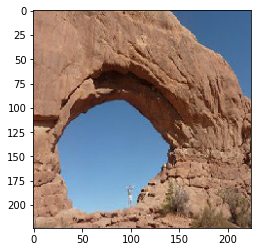

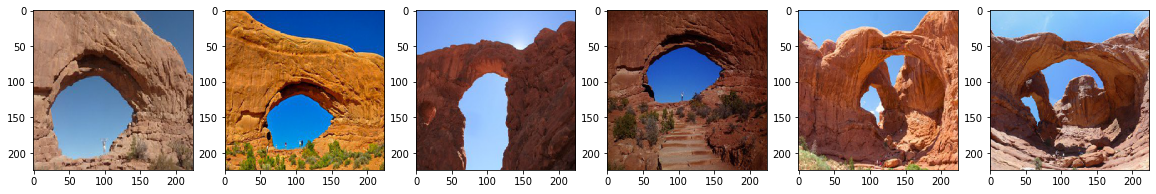

In [29]:
# There are 200 images in the dataset
# select  image i (using its index) and show the top k images that are most similar
i = 140
k = 6
query = features[i:i+1]
distances, indices = get_similar(faiss_index, query,k) 
query = img_holder[i]
plot_similar(query, [img_holder[i] for i in indices.tolist()[0]])